In [1]:
# what the model will predict?
# The model aims to predict breast cancer diagnosis (Malignant or Benign) based on features from FNA images.

In [2]:
#importing important libraries
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from keras.utils import plot_model

In [3]:
# Reading the dataset
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')

# Handling categorical data and feature normalization
# data preprocessing
df['diagnosis'].value_counts()
y = df["diagnosis"].values
df = df.rename(columns={'diagnosis': 'Label'})
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y)
X = df.drop(labels=["Label", "id", "Unnamed: 32"], axis=1)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [4]:
# 3. Data Visualization:
df.head()

,id,Label,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   Label                    569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# Initializing lists to store accuracies and losses for a specific split
train_accuracy = []
val_accuracy = []
train_loss = []
val_loss = []

# Defining the specific split to analyze (split 99)
specific_split = 99

# Splitting data into train and test sets for the specific split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=specific_split)

In [7]:
#Neural Network Choice:
# Building a Sequential model
model = Sequential()
model.add(Dense(16, input_dim=30, activation='relu'))  # Hidden Layer
model.add(Dropout(0.4))  # Dropout Layer
model.add(Dense(1, activation='sigmoid'))  # Output Layer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Neural Network Architecture Explanation:
The neural network diagram represents the architecture of the model used for breast cancer diagnosis prediction.

Input Layer:
The input layer comprises 30 neurons, corresponding to the features extracted from Fine Needle Aspiration (FNA) images.

Hidden Layer:
Dense Layer (16 neurons, ReLU activation):
The hidden layer consists of 16 neurons employing the Rectified Linear Unit (ReLU) activation function.
ReLU introduces non-linearity, allowing the model to capture complex patterns in the data.
Dropout Layer (Dropout rate: 0.4):
This layer applies a dropout technique, randomly deactivating 40% of the neurons during training.
Dropout helps prevent overfitting by enhancing model generalization.

Output Layer:
Dense Layer (1 neuron, Sigmoid activation):
The output layer has a single neuron using the Sigmoid activation function.
Sigmoid transforms the network's output into probabilities, aiding in the binary classification task: Malignant or Benign.

Interpretation of the Diagram:
Arrows and Connections:
Arrows denote the flow of information through the layers during the forward pass of the model.
Each arrow signifies the connections between neurons, illustrating the network's architecture.
Layer Structure:
Input and output layers are clearly labeled, with hidden layers in between, showcasing the network's topology.
Shapes and Notations:
Shapes and notations on the diagram represent the number of neurons in each layer and the activation function used.

In [8]:
#training
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=0)

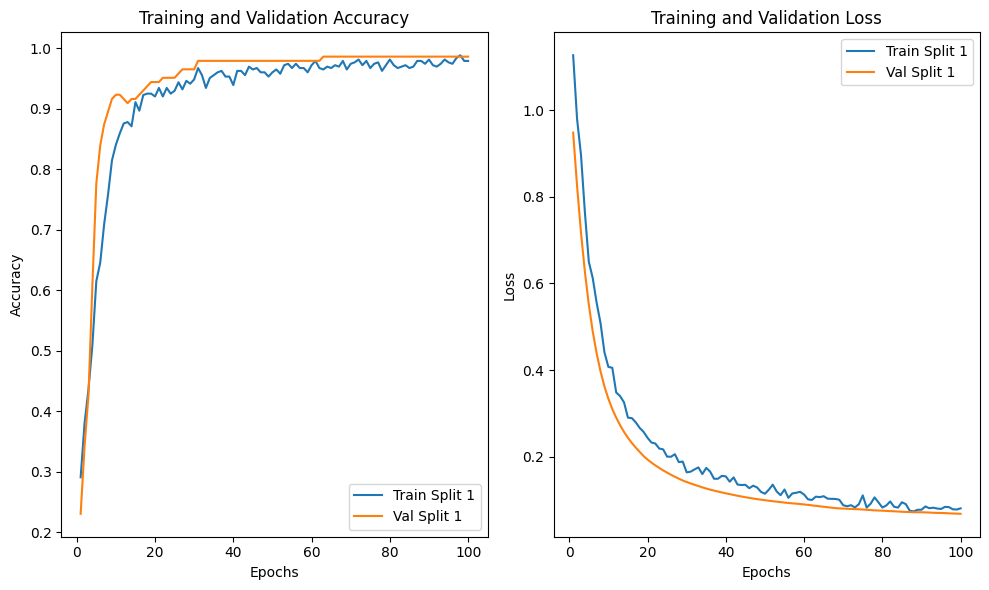

In [9]:
# Appending training/validation loss and accuracy for plotting
train_accuracy.append(history.history['accuracy'])
val_accuracy.append(history.history['val_accuracy'])
train_loss.append(history.history['loss'])
val_loss.append(history.history['val_loss'])

# Plotting training/validation accuracy and loss in one graph for the specific split
plt.figure(figsize=(10, 6))

# Plotting training and validation accuracy
plt.subplot(1, 2, 1)
for i in range(len(train_accuracy)):
    plt.plot(range(1, len(train_accuracy[i]) + 1), train_accuracy[i], label=f"Train Split {i+1}")
    plt.plot(range(1, len(val_accuracy[i]) + 1), val_accuracy[i], label=f'Val Split {i+1}')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
for i in range(len(train_loss)):
    plt.plot(range(1, len(train_loss[i]) + 1), train_loss[i], label=f"Train Split {i+1}")
    plt.plot(range(1, len(val_loss[i]) + 1), val_loss[i], label=f'Val Split {i+1}')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



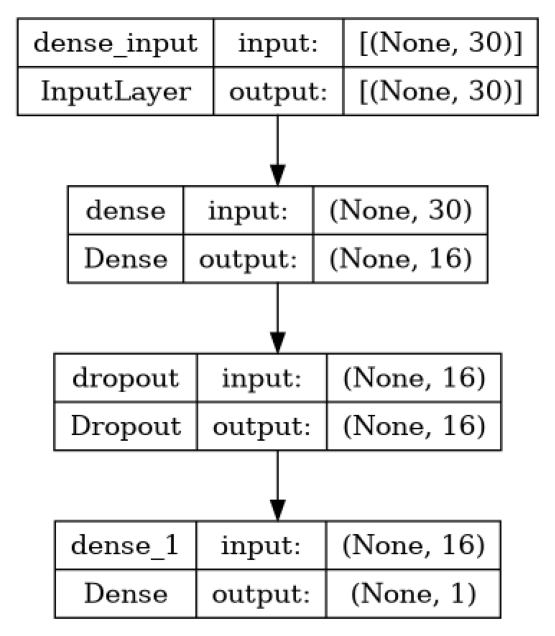

In [10]:
# 5. Neural Network Diagram:

plot_model(model, to_file='neural_network_diagram.png', show_shapes=True, show_layer_names=True)

# Displaying the neural network diagram
nn_diagram = plt.imread('neural_network_diagram.png')
plt.figure(figsize=(8, 8))
plt.imshow(nn_diagram)
plt.axis('off')
plt.show()